In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
df_features = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df_features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df_target = pd.DataFrame(cancer.target, columns=['target'])
df_target['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

According to the dataset's description, the distribution of the target variable is: 212 - Malignant, 357 - Benign. Thus, 'benign' and 'maglinant' are presented as 1 and 0, respectively.

In [5]:
df = pd.concat([df_features, df_target], axis=1)
df['target'] = df['target'].apply(lambda x: "Benign"
                                  if x == 1 else "Malignant")
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Malignant


In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Text(0.5, 1.0, 'Count Plot of Diagnosis')

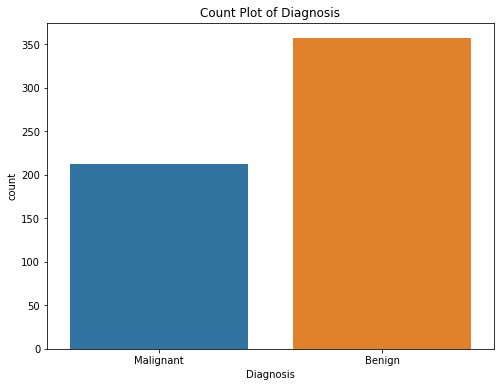

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(df['target'])
plt.xlabel("Diagnosis")
plt.title("Count Plot of Diagnosis")

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_features)

features_scaled = scaler.transform(df_features)
features_scaled = pd.DataFrame(data=features_scaled,
                               columns=df_features.columns)

df_scaled = pd.concat([features_scaled, df['target']], axis=1)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,Malignant
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,Malignant
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,Malignant
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,Malignant
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,Malignant


In [9]:
df_scaled_melt = pd.melt(df_scaled, id_vars='target',
                         var_name='features', value_name='value')

In [10]:
# Set style
sns.set_style('darkgrid')

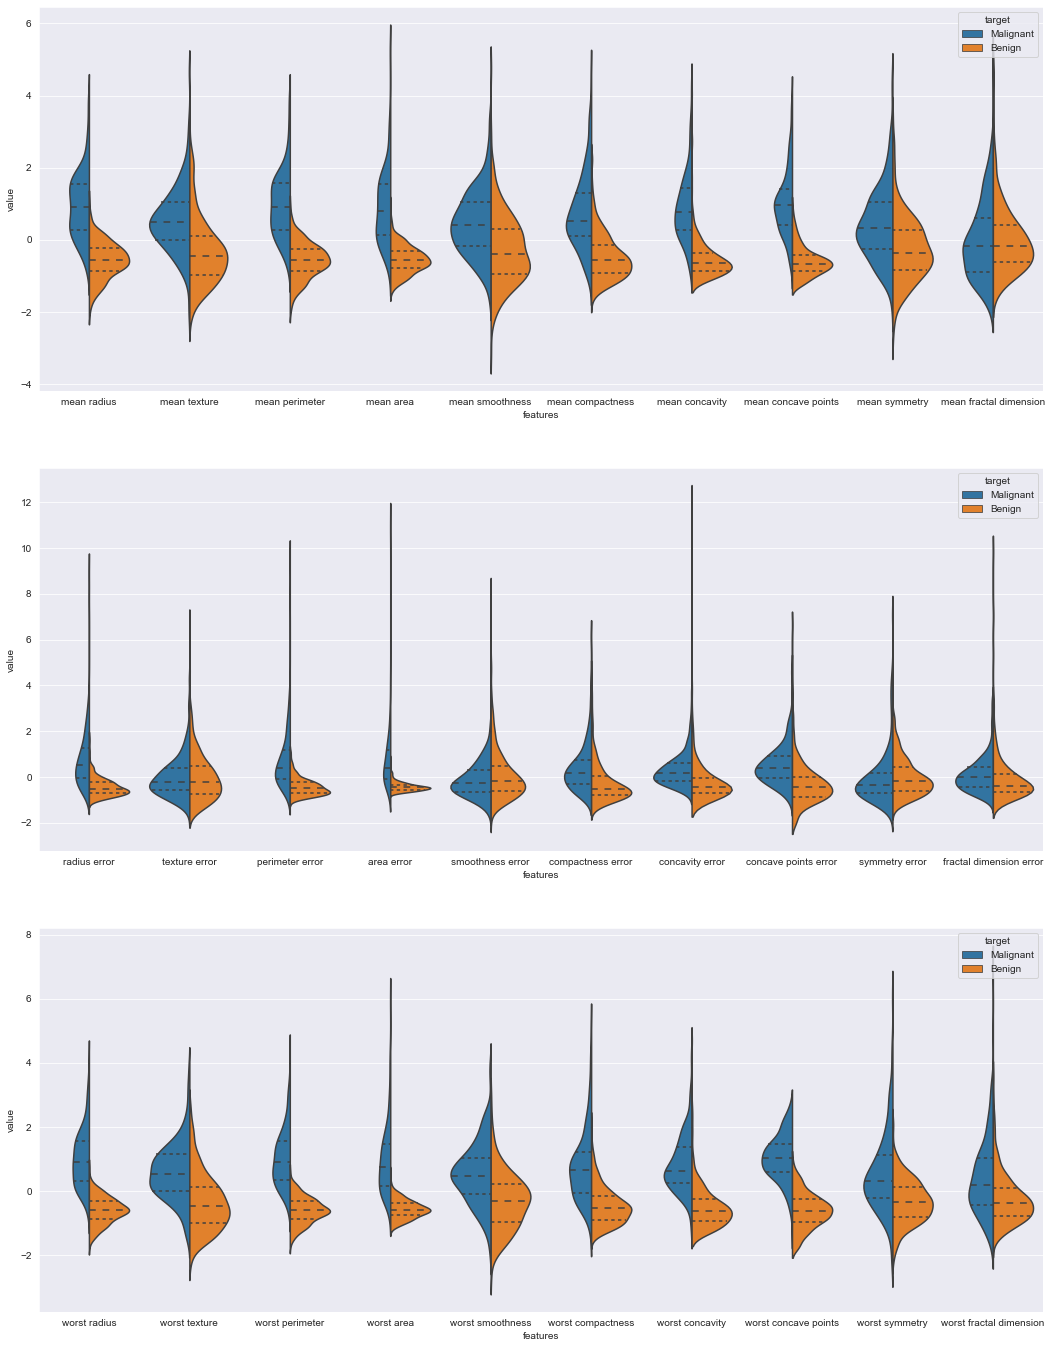

In [11]:
fig, axes = plt.subplots(3,1)
fig.set_size_inches(18, 24)

for i in range(0,3):
    query = ''
    for x in df.columns[i*10:10+i*10]:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]

    # Create data for visualization
    data = df_scaled_melt.query(query)
    sns.violinplot(x='features',y='value',hue='target',data=data,split=True,inner="quart",ax = axes[i])
fig.savefig("Violinplot.png")
#plt.close(fig)

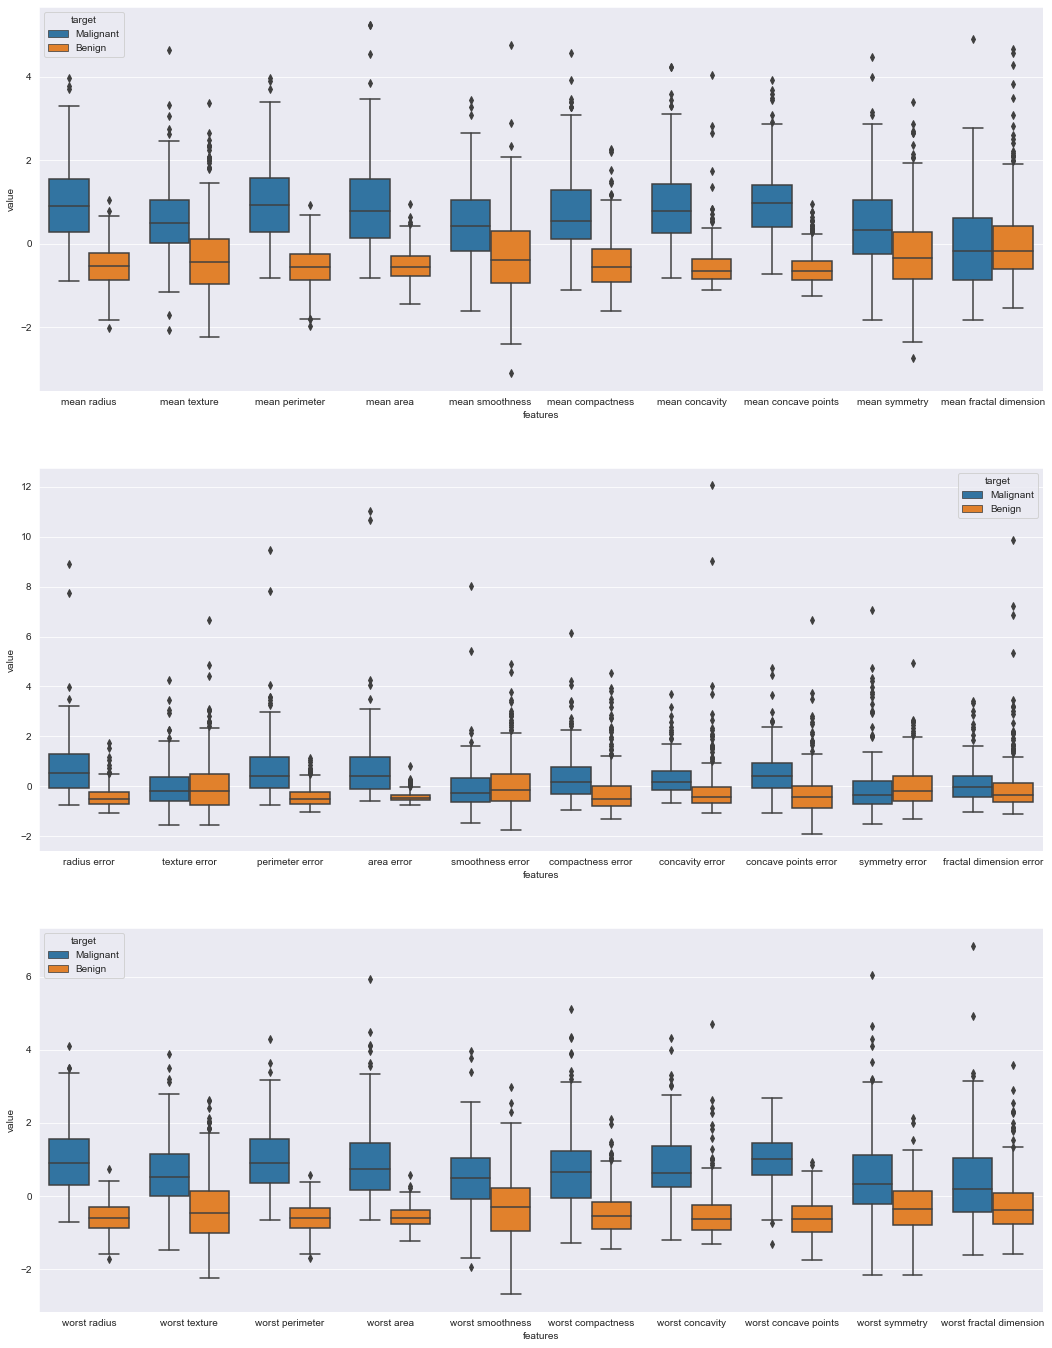

In [12]:
fig, axes = plt.subplots(3,1)
fig.set_size_inches(18, 24)

for i in range(0,3):
    query = ''
    for x in df.columns[i*10:10+i*10]:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]

    # Create data for visualization
    data = df_scaled_melt.query(query)
    sns.boxplot(x='features',y='value',hue='target',data=data,ax = axes[i])
fig.savefig("Boxplot.png")
#plt.close(fig)

From the graphs above, we can reach certain conclusions. First of all, from the violin graph, we can see that some distributions are noticebly different between malignant and benignin. This means that these features are going to be very good to train our models with. On the other hand, we can also see some features having similar distribuitions, meaning they are going to be weak at classifying the type of the tumor. 
Finally, the previous graphs can be used to spot similar distributions. Similar distributions are a sign of correlation between the features. This is why, as the next step, we are going to analyze the correlation matrix


/var/folders/b6/t14lv28n5xqdhgq7zcrqwfkm0000gn/T/ipykernel_1669/706772433.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_mat, dtype=np.bool)


<AxesSubplot:>

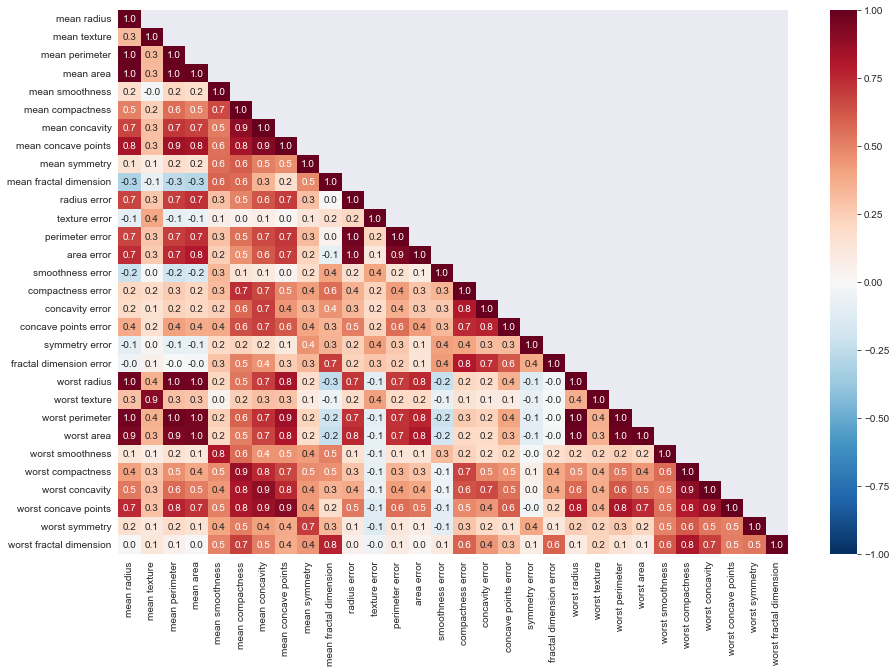

In [49]:
# Create correlation matrix
corr_mat = df.corr()

# Create mask
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat, annot=True, fmt='.1f',
            cmap='RdBu_r', vmin=-1, vmax=1,
            mask=mask)

<AxesSubplot:>

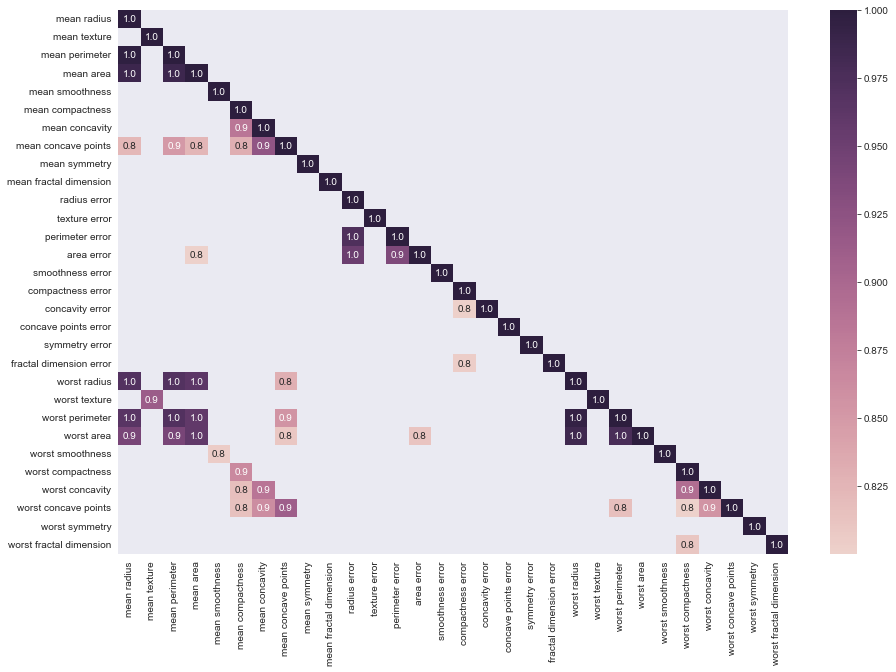

In [14]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat[corr_mat > 0.8], annot=True,
            fmt='.1f', cmap=sns.cubehelix_palette(200), mask=mask)

In [15]:
from sklearn.feature_selection import SelectKBest, chi2
feature_selection = SelectKBest(chi2, k=5)
feature_selection.fit(df_features, df_target)
selected_features = df_features.columns[feature_selection.get_support()]
print("The five selected features are: ", list(selected_features))

The five selected features are:  ['mean perimeter', 'mean area', 'area error', 'worst perimeter', 'worst area']


In [16]:
X = pd.DataFrame(feature_selection.transform(df_features),
                 columns=selected_features)
X.head()

,mean perimeter,mean area,area error,worst perimeter,worst area
0,122.80,1001.0,153.40,184.60,2019.0
1,132.90,1326.0,74.08,158.80,1956.0
2,130.00,1203.0,94.03,152.50,1709.0
3,77.58,386.1,27.23,98.87,567.7
4,135.10,1297.0,94.44,152.20,1575.0


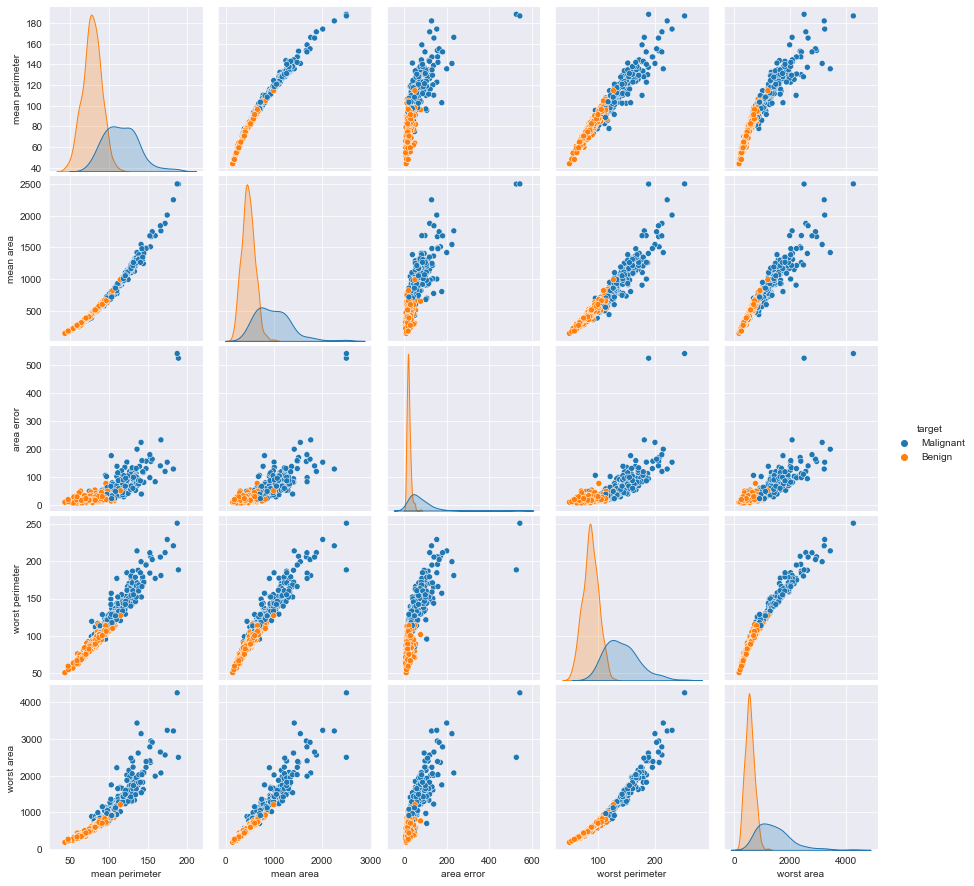

In [17]:
sns.pairplot(pd.concat([X, df['target']], axis=1), hue='target')

In [18]:
from sklearn.model_selection import train_test_split
y = df_target['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 65   2]
 [  2 119]]


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.98      0.98      0.98       121

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



In [23]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = [
        {'n_estimators': [3, 10, 30,50,100,150],'max_depth':[1,2,3,4,5,6,10,20]}
]

forest_reg = RandomForestClassifier()
grid_search = GridSearchCV(forest_reg, param_grid,
                               scoring='neg_mean_squared_error',
                               return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 4, 'n_estimators': 3}

In [47]:
rfc2 = RandomForestClassifier(n_estimators=4,max_depth=4)
rfc2.fit(X_train, y_train)
y_pred2 = rfc.predict(X_test)

In [48]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred2))

Confusion Matrix:
 [[ 65   2]
 [  2 119]]


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.98      0.98      0.98       121

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



In [59]:
df_tar = pd.concat([df_features, df_target], axis=1)
corr_mat = df_tar.corr()
corr_mat['target'].sort_values(ascending=False)

target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

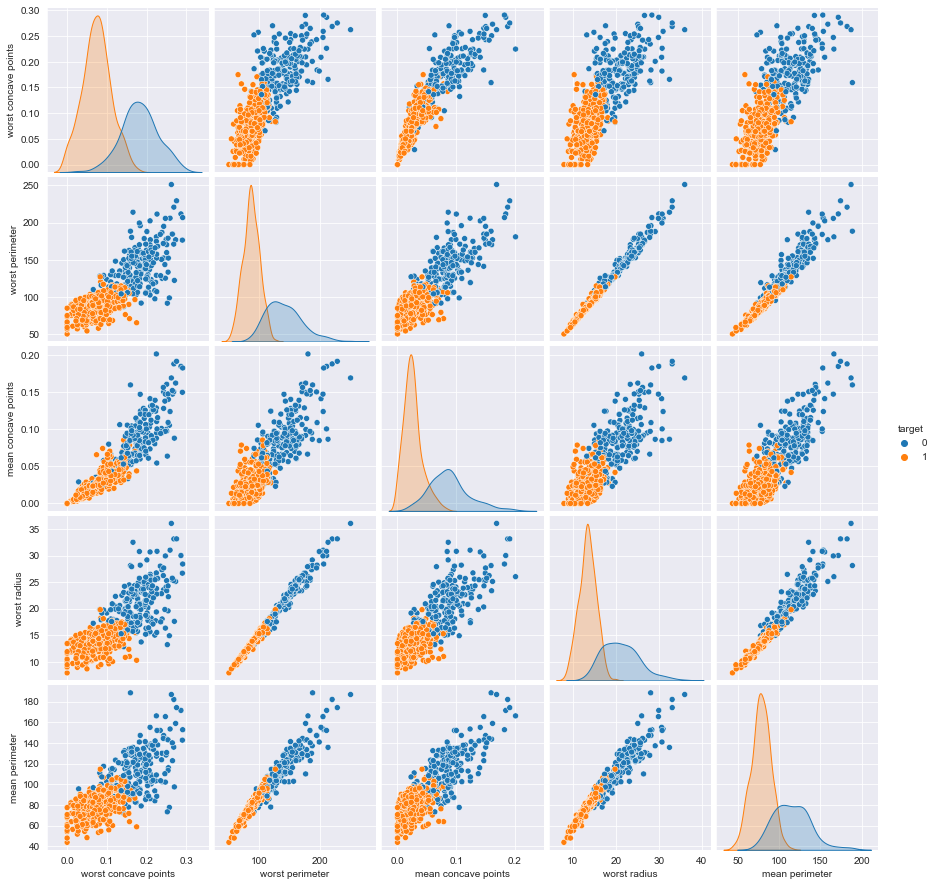

In [69]:
features = ['worst concave points','worst perimeter','mean concave points','worst radius','mean perimeter']
df_target = df_tar[features]
sns.pairplot(pd.concat([df_target, df_tar['target']], axis=1), hue='target')

In [89]:
from sklearn.linear_model import RidgeClassifier
ridge_reg = RidgeClassifier(alpha=1, solver="cholesky")
ridge_reg.fit(X_train, y_train)

y_pred_ridge = ridge_reg.predict(X_test)

In [90]:

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ridge))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred_ridge))

Confusion Matrix:
 [[ 60   7]
 [  4 117]]


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92        67
           1       0.94      0.97      0.96       121

    accuracy                           0.94       188
   macro avg       0.94      0.93      0.94       188
weighted avg       0.94      0.94      0.94       188



In [97]:
param_grid = [
        {'alpha': [1,2],'solver':['auto', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga' ]}
]

r_clas = RidgeClassifier()
grid_search = GridSearchCV(r_clas, param_grid,
                               scoring='neg_mean_squared_error',
                               return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'alpha': 1, 'solver': 'auto'}

In [98]:
ridge_reg = RidgeClassifier(alpha=1, solver="auto")
ridge_reg.fit(X_train, y_train)

y_pred_ridge2 = ridge_reg.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ridge2))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred_ridge2))

Confusion Matrix:
 [[ 60   7]
 [  4 117]]


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92        67
           1       0.94      0.97      0.96       121

    accuracy                           0.94       188
   macro avg       0.94      0.93      0.94       188
weighted avg       0.94      0.94      0.94       188



In [100]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X_train, y_train)

SVR(C=100, degree=2, kernel='poly')

In [105]:
param_grid = [
        {'kernel': ['poly'],'degree':[1,2], 'C':[100,200,300,400]}
]

r_clas = SVR()
grid_search = GridSearchCV(r_clas, param_grid,
                               scoring='neg_mean_squared_error',
                               return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 400, 'degree': 1, 'kernel': 'poly'}

In [106]:
svm_poly_reg = SVR(kernel="poly", degree=2, C=400, epsilon=0.1)
svm_poly_reg.fit(X_train, y_train)
y_pred_svr = ridge_reg.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svr))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred_svr))

Confusion Matrix:
 [[ 60   7]
 [  4 117]]


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92        67
           1       0.94      0.97      0.96       121

    accuracy                           0.94       188
   macro avg       0.94      0.93      0.94       188
weighted avg       0.94      0.94      0.94       188

